# Research focus 

Given our interest in video games, I was having to grow up playing video games. We remember certain games from our adolescents, which led us to wonder our research question: 

Suppose any continuous trends persist in the sale data; how does it change over time? If there are changes in the directions, we hope to identify it and visualize it.

To begin our quest of understanding if there are any continuous trends in sale data. We worked out some analysis on our datasets. Before we explored and researched the data, we applied some wrangling to filter out data that were not noisy by setting a parameter of game sales between 5 and 90 million—then filtered by games that were ranked higher than 2500.

In **Part 1**, we perform some overview exploration and analysis of preliminary data. In **part 2**, the investigation focused on the dataset with additional visualization to answer our research question. 


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stsc

# Setting the styles of the graphs following
sns.set_style("dark")
sns.set_theme(font_scale = 1, color_codes = True)
plt.style.use(["tableau-colorblind10"])


# Part 2

--- 

## 2.1 Intro

We are going to explore the sales number including a wide range of data! To reduce the spread of data and effects of outliers. The column Average_data (each row of the global sales divided by the median of total global sales) is added to reduce the spread the data of our database. 

We are viewing this on a global scale[^Big] and focusing our report.

Brian Su

[^Big]: In the data processing, we noticed a lot of low sales titles that created horrible mean and median values. Those values were filtered out, more specification are in the found in `/../../analysis/Brian/Milestone 2 Analysis.ipynb` 

In [33]:
from scripts import brian_load_and_process as blp#from analysis.scripts import load_and_process
dfAll = blp.load_and_process_all("../../data/processed/processed_data_All.csv")
dfNin = blp.load_and_process_nintendo("../../data/processed/processed_data_All.csv")
dfAll

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,21.269923
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10.344473
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,9.208226
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,8.483290
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,8.064267
...,...,...,...,...,...,...,...,...,...,...,...,...
611,612,Dragon Warrior,NES,1986.0,Role-Playing,Capcom,0.49,0.00,0.52,1.51,2.52,0.647815
612,613,Tomb Raider (2013),PS3,2013.0,Action,Square Enix,0.60,1.31,0.08,0.52,2.51,0.645244
613,614,Marvel: Ultimate Alliance,X360,2006.0,Role-Playing,Activision,2.29,0.02,0.00,0.19,2.50,0.642674
614,615,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,Konami Digital Entertainment,0.13,0.07,0.26,2.05,2.50,0.642674


To understand our wrangled but un-processed data better, we start by describing the dataset. 

In [34]:
dfAll.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,616.0,308.500000,177.968162,1.000000,154.75000,308.500,462.250000,616.000000
Year,611.0,2005.006547,7.213373,1980.000000,2001.00000,2007.000,2010.000000,2016.000000
NA_Sales,616.0,2.701623,3.156317,0.000000,1.37000,1.985,2.930000,41.490000
EU_Sales,616.0,1.701364,1.922307,0.000000,0.80000,1.240,1.992500,29.020000
JP_Sales,616.0,0.723231,1.235949,0.000000,0.02750,0.120,0.912500,10.220000
Other_Sales,616.0,0.538003,0.777021,0.000000,0.20000,0.355,0.640000,10.570000
Global_Sales,616.0,5.664091,5.718052,2.500000,3.03000,3.890,5.667500,82.740000
Averaged_Sales,616.0,1.456065,1.469936,0.642674,0.77892,1.000,1.456941,21.269923


Looking at the mean column, we can see that NA contributes most to global sales this could indicate there is a large population of gamers in North America(about 48% of sales on average are from NA). We can see that the max number of total NA sales is almost 50% of the max total global sales.

Given this data we can say that the major gaming regions are North America, Europe and Japan respectively to the amount they contribute to global sales.

We are going to use a pairplot to provide us with an overview relationship of each variable against each other. 

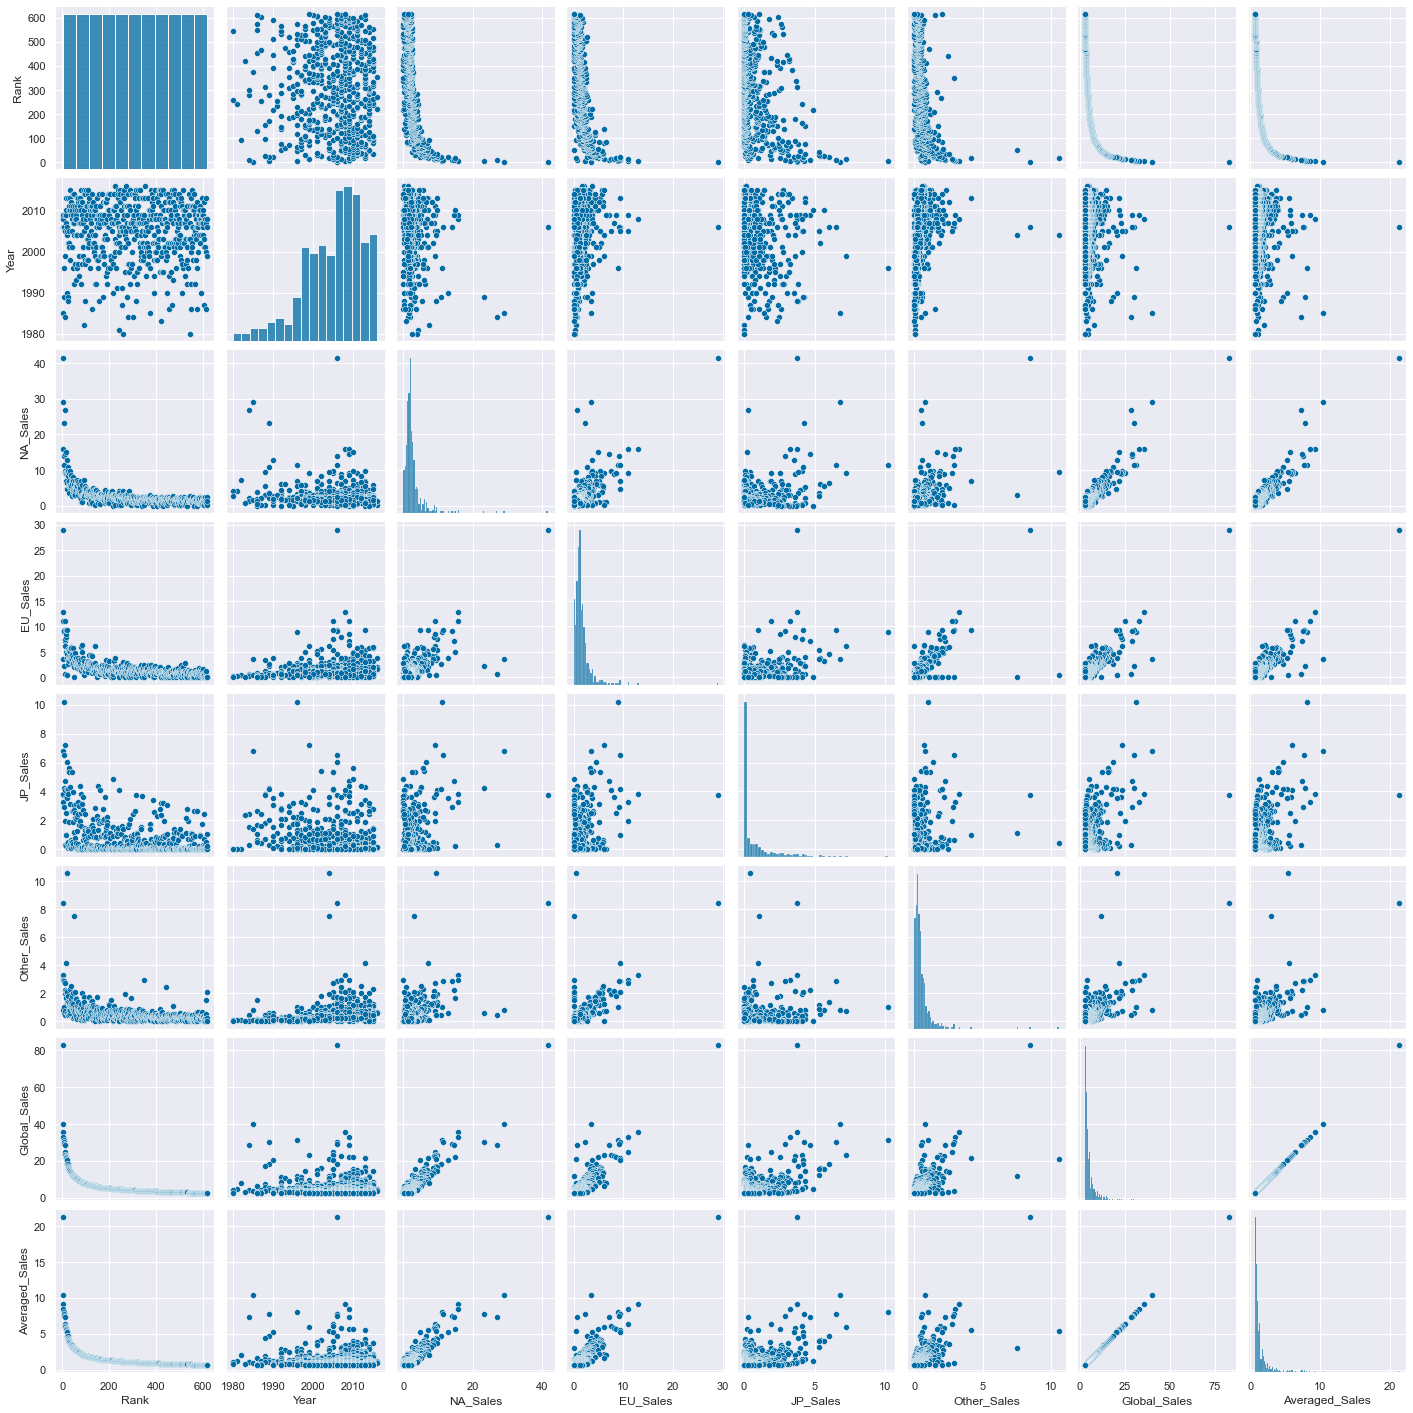

In [35]:
sns.pairplot(dfAll)


The pairplot gave us some interesting characteristics about our data that we can explore further on. We can see that some of the variables seem to have a positive, negative, and no correlation.

From the first column from the left, we can see that as rank increases (ranked further down) the sales of the games goes down and vice versa. Another thing that we can see, is that more games are released in recent years then years before year 2000.

From this, we wanted to explore if there were certain genres of games that sold particularly well. To determine this relationship, we employ a boxplot layered with a stripplot to assists us in the process.

<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

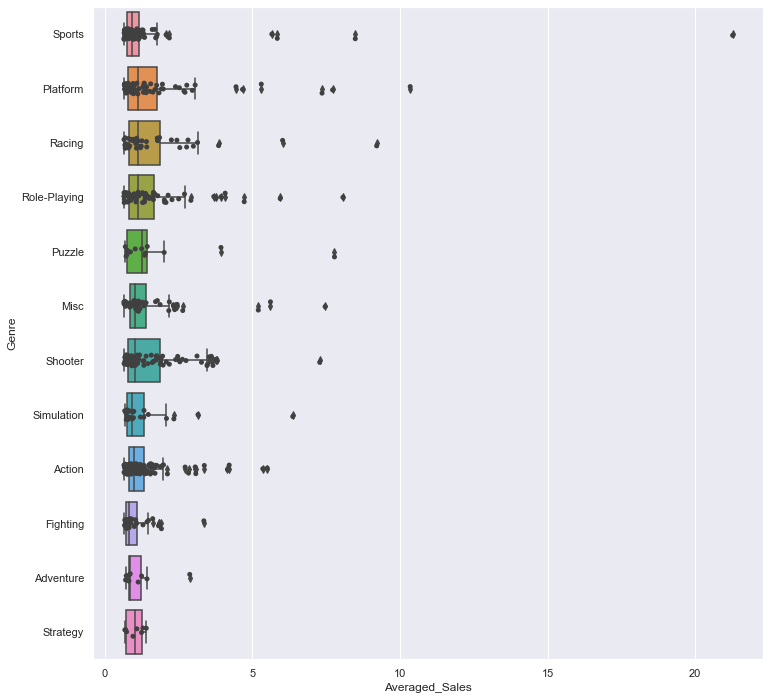

In [36]:
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfAll, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfAll, x = "Averaged_Sales", y = "Genre", color = "0.25")

Looking at the boxplots, we can identify a lot of outlier data that lies outside of the InterQuartile Range (IQR) of the data. Especially, the sports genre where its outlier lies way beyond another other genre sales. 
This suggests that the sports genre games were either a hit or miss whereas the other genres were relatively consistent as their IQR is relatively small.


After plotting each genre with it's Averaged Sales throughout the years. We see that sports titles are awfully popular and good selling. Now we have to determine if there is in fact a trend with the sales of these popular titles.

--- 

## Global Sales Trend
We want to see the global sales of games by the year. To hopefully establish a trend or discover some more useful data in the process. For this process, we chose to employ the `groupby` process to group up by year, genre, publisher and platform of the different published games. Once the grouping is done, we take the sum of global sales to plot the graph of sales of games over the years.



The grouping results are sampled below:

In [37]:
df2016G = dfAll.groupby(["Year","Genre", "Publisher", "Platform"]).sum()["Global_Sales"]

dfG = pd.DataFrame(df2016G)
dfG

Global_Sales
Year   Genre    Publisher                   Platform              
1980.0 Shooter  Atari                       2600              7.07
1981.0 Platform Activision                  2600              4.50
1982.0 Puzzle   Atari                       2600              7.81
1983.0 Sports   Nintendo                    NES               3.20
1984.0 Racing   Nintendo                    NES               4.16
...                                                            ...
2015.0 Sports   Electronic Arts             XOne              3.23
                Take-Two Interactive        PS4               3.85
2016.0 Shooter  Sony Computer Entertainment PS4               4.20
                Ubisoft                     PS4               3.61
       Sports   Electronic Arts             PS4               4.77

[545 rows x 1 columns]

--- 
Graph of the results from `groupby` function. 
Most of the axis labelled stand only to illustrate a Nintendo dominated sales trend in the years 2000 and onwards. 

--- 

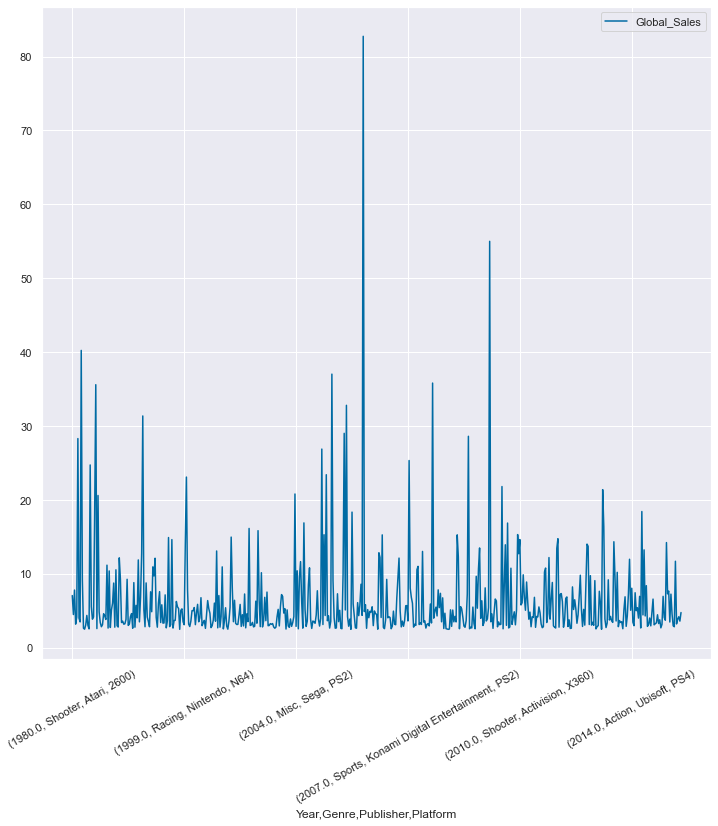

In [38]:
dfG.plot(figsize=(12,12))
plt.xticks(rotation=30) 
plt.show()

---

The graph does not show us a particular sales trend that persists through the years. As the peaks labeled are of different genres for most peaks. Although, at the current stage of our exploration, we have to determine who publishes all these high selling games.

--- 
## 1.3 The Nintendo Magic

We being to unveil the Nintendo magic that we have previous missed. This section details the process of how that was accomplished.


The dataframe dfNin was declared in the setup section located at the top of the notebook. It shows a top 5 game sales dominated by Nintendo titles. 

In [39]:
dfNin.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.564315
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,4.150761
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,4.013831


<AxesSubplot:xlabel='Averaged_Sales', ylabel='Publisher'>

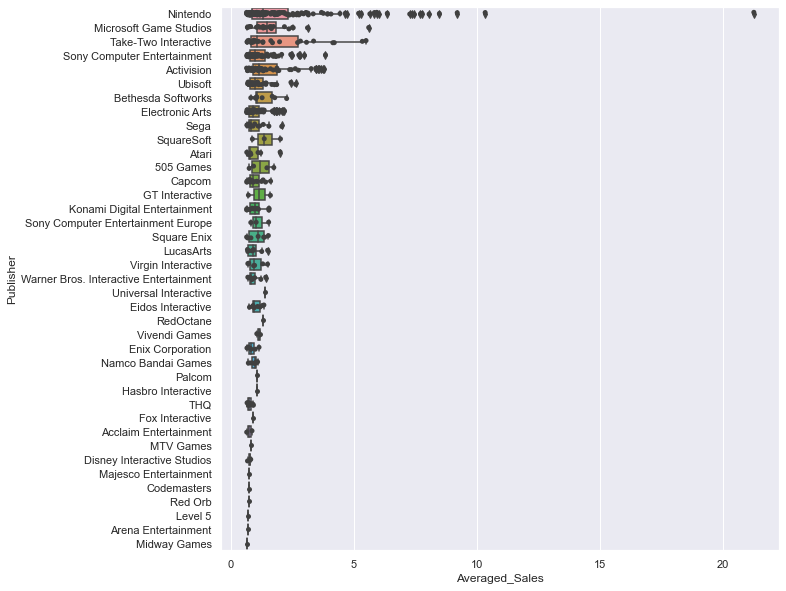

In [40]:
plt.figure(figsize=(10, 10))
sns.boxplot(data = dfAll, y = "Publisher", x = "Averaged_Sales")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfAll, y = "Publisher", x = "Averaged_Sales", color = "0.25")

Since our wrangling, Nintendo is left standing as the biggest publisher that made hot-selling games. We wanted to shift focus to it's dominance and sales numbers. Through our analysis, we will look at any trends in Nintendo releases. The boxplot helped us determine who had the most publishes and sales to establish a trend in the data hopefully. 

<AxesSubplot:xlabel='Year', ylabel='Averaged_Sales'>

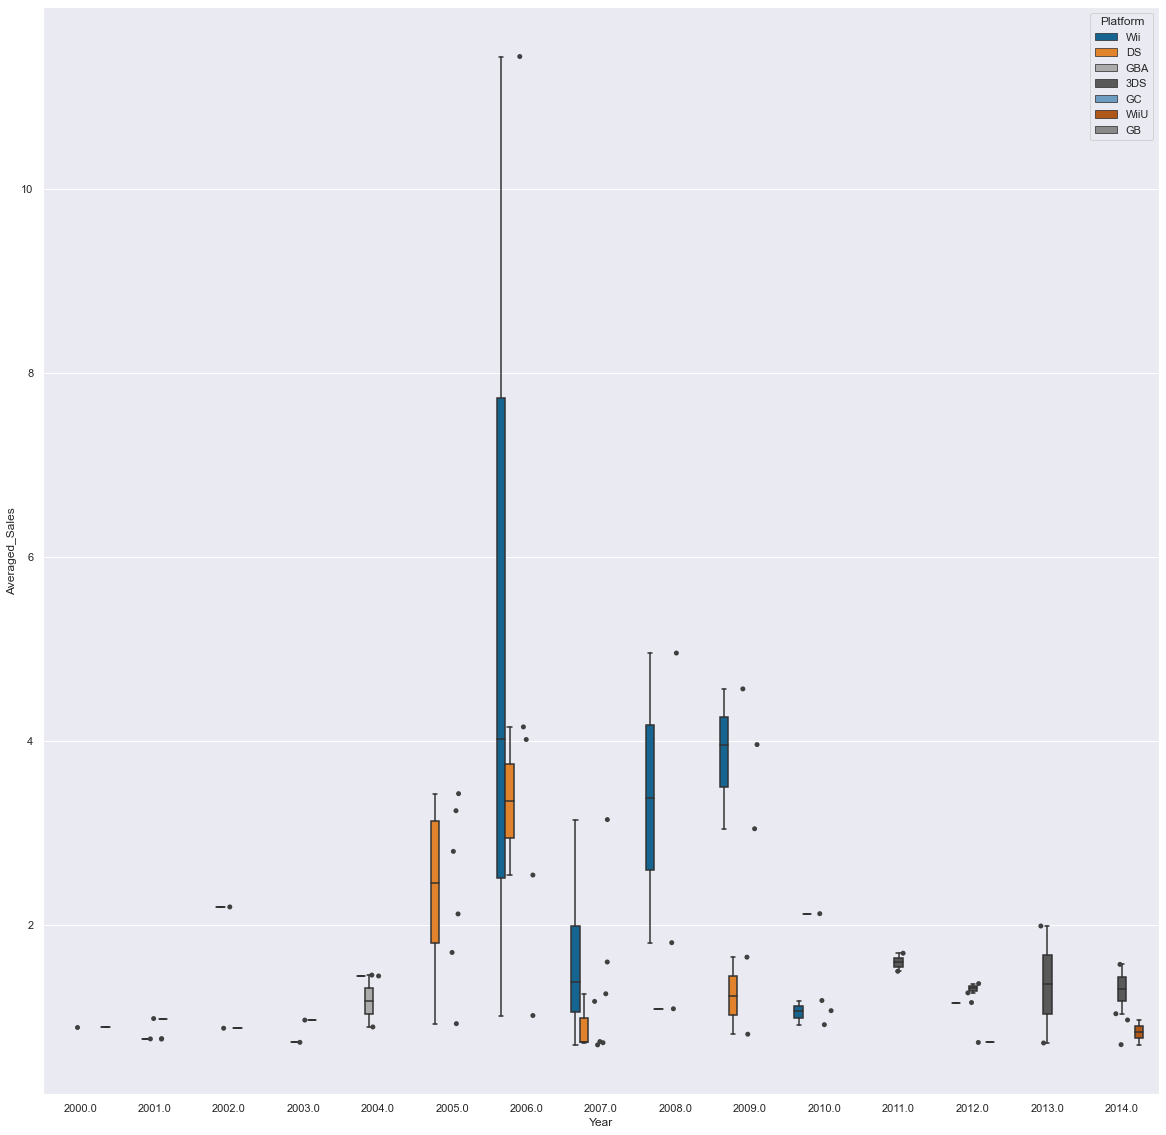

In [41]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = dfNin, x = "Year", y = "Averaged_Sales", whis = 1.5, hue ="Platform")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Year", y = "Averaged_Sales", color = "0.25")

From the graph, we see a more in-depth break down of Nintendo sales per title and by the platform. For a while, the Wii titles were going strong from the time when it launched. Which the peak of Wii sport sales is apparent in the 2016 stripplot. Topping the averaged sales of 10[^1], averaged sales is obtained by `global_sales/median(global_sales)` Refer to top for more information on the process.  

This gives us an idea of Nintendo's focus on the Wii and it's huge success in the few years of its launch. This made us curious about what types of games is selling so well? We find out by the following plots. 

[^1]: Units are in million units. 

---

## 1.3.1 Which genres are HOT

Investigating Wii average sales per genre after year 2000, only considering games ranked higher than 2500.



<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

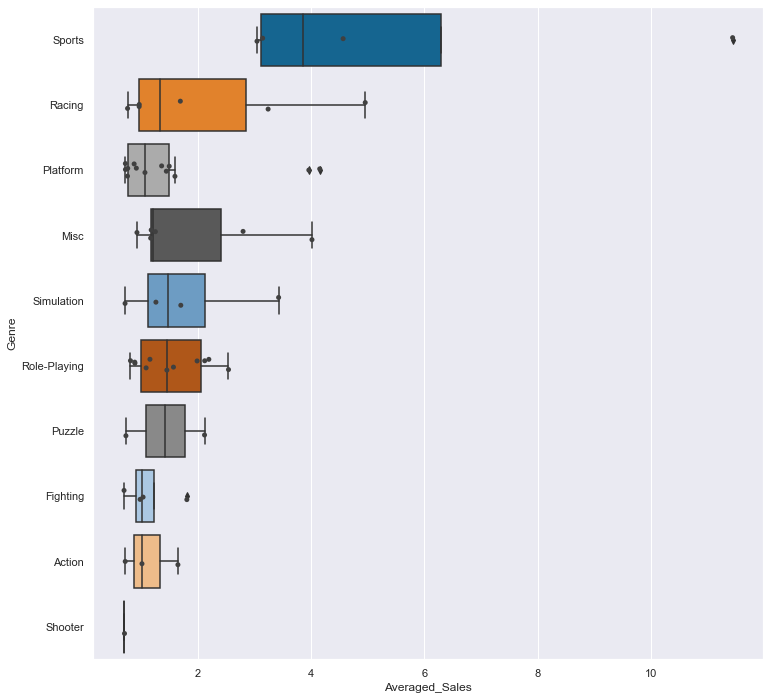

In [42]:
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfNin, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Averaged_Sales", y = "Genre", color = "0.25")

**Surprise, suprise** the top genre of games that sold were the sports titles—considering our previous understanding that the Wii platform drove a lot of Nintendo sales. The Nintendo Wii was a platform that focused on movement. It had not one but two controllers to be held in each hand of the user. The game console had a sensor that tracked the activities of the controllers. With which the users could play sports or interact with the game that way. It was creating a lot of moments as compared to other consoles using a simple traditional controller. Thus, in the period from 2006 to 2009 we see higher sales of sport titles.

Further analysis on the trends are in part 2. 

--- 

 # Part 2

In [43]:
from scripts import spandan_load_and_process as slp
region_genre_popularity = slp.sales_by_region("../../data/processed/processed_data_All.csv")
old_genres= slp.genre_popularity_old("../../data/processed/processed_data_All.csv")
new_genres= slp.genre_popularity_new("../../data/processed/processed_data_All.csv")
best_genres = slp.top_genre_best("../../data/processed/processed_data_All.csv")

We focused more specifically on the trend of the genres of video games. We compared how sales of video
games differed in each region by their genres. Secondly we compared the distribution of genres between 
the first 19 years which represented last century trend of genres and the current century was represent by the 
rest 20 years of genres. Lastly we wanted to see how many of each typed of genres was present in the top
100 ranked games of the current century.

## 2.1 Genre Popularity by Region

In [44]:
region_genre_popularity

,NA_Sales,EU_SALES,JP_SALES,OTHER_SALES
Genre,,,,
Action,250.19,200.92,42.72,77.95
Adventure,11.15,15.03,4.66,3.48
Fighting,44.17,34.69,22.11,10.97
Misc,124.23,90.34,32.87,25.40
Platform,108.61,109.74,79.89,26.49
Puzzle,11.10,20.01,19.45,4.25
Racing,84.75,90.18,34.73,31.57
Role-Playing,124.98,104.49,140.33,27.72
Shooter,250.11,157.38,12.83,53.22


<Figure size 3600x2160 with 0 Axes>

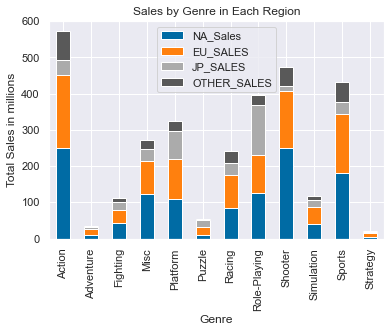

<Figure size 3600x2160 with 0 Axes>

In [45]:
region_genre_popularity.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales in millions')
plt.title('Sales by Genre in Each Region')
plt.figure(figsize=(50,30))


So from the above figure we can clearly see that Action was the most popular genre with highest number of sales. The lowest sales are held by Adventure,Strategy and Puzzle. Accross all genres it can clearly be seen that almost all game sales are dominated by EU which is a little surprising as I always assumed North America had a bigger gaming culture in general. In close 2nd of the most sales can be seen by NA. Looking closely at the Role-Playing genre, it seems that Japan has the highest sales accross all the other genres and we can say that Role-Playing is the most popular genre of video game in Japan. It is surprising to see Sports beings the 2nd highest number of sales but it makes sense and games like Fifa and 2k have  had a huge player base since the beggining.

---

## 2.2 Comparing Genre Trend Between 2 Different Centuries

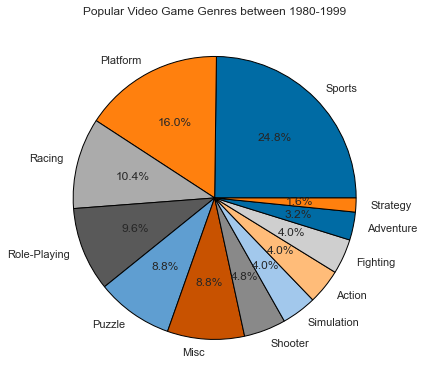

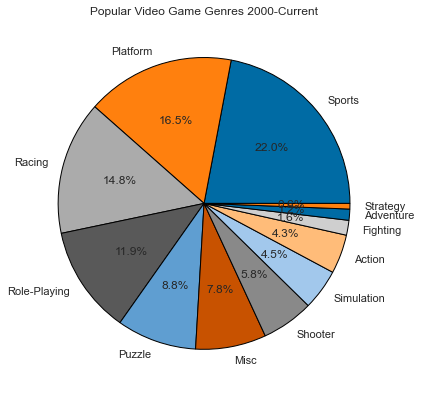

In [46]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(6,6))
old = plt.pie(list(old_genres['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres between 1980-1999')
plt.tight_layout()
plt.show()


labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy']
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(6,6))
new = plt.pie(list(new_genres['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Video Game Genres 2000-Current')
plt.tight_layout()
plt.show()

In both centuries Sports is the most popular genre which is little surprising. Both of these pie charts show that the Action genre was one of the least popular genres despite it have highest number of sales. In the plot from **2.1** we can see that the Platform genre didnt have a lot of sales but it is the 2nd most popular genre of video games, this is because Nintendo dominated the market in the previous century and in the early 2000s, as they primarily made Platformers. The worst genre in both centuries is Strategy, which makes sense as it also had the lowest amount of sales compared to the other genres.

---

## The Highest Ranked Genre 

([<matplotlib.axis.XTick at 0x1e9cc671640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

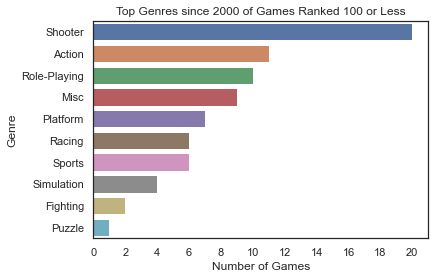

In [47]:
sns.set_theme(style="white")
publishx = sns.countplot(data = best_genres,y="Genre" ,order = ['Shooter','Action','Role-Playing','Misc','Platform','Racing','Sports','Simulation','Fighting','Puzzle'])
plt.xlabel('Number of Games')
plt.title('Top Genres since 2000 of Games Ranked 100 or Less')
plt.xticks(np.arange(0, 21, step=2))

So we decided to find the Top 100 games of the entire dataset and see if any particular genre stood out. Since 2000 of the higest ranked games, Shooters was the most succesfull as they had the most games contributing to the top 100. It is a little surprsing as the plot from **2.2** shows that it was one of the not so popular genres but it had a significant amount of sales as seen from **2.1**. Action and Role-Playing games are still in the top 3 of the most number of games in the top 100 which does suggest that the mumber of sales does have some relationship with the best genres.

---

## Summary

We wanted to find if there was a continuous trend in the sale of video games. Given our analysis, we have come to see that there was a relationship between genres of video games and sales. Throughout all the years it seems that Nintendo remained the king of video games which makes sense as they were one of the first major video game developing companies. The best 100, most games sold, Nintendo has completely dominated the video game market. Not only have they launched a successful console; the Wii but they have also contributed towards the most popular genre of all time, Sports. In 2006 Nintendo had the highest average sales compared to any other publisher as they had a strong driving force through the sale of family games like Wii Sport, Pokemon, and everyone's beloved console, the Wii. 

Although the sports genre remained popular, this wasn't reflected in the sales by genre in each region. Shooters had the most amount of sales with almost 600 million in sales, this would suggest that although shooter games were being bought more people enjoyed sports games more. Since the 2000s amongst the top 100 ranked games, Shooters contributed the majority of it with the Sports genre holding few titles only this portrays that consumer's taste in games slowly shifted which reflected in the number of sales in each region. This comes to shows that people's taste in video games was heavily reliant on what was new and exciting. Finally, we can say that there is no continuous trend but more of a seasonal trend, which means people buy games mainly based on personal preferences as over time  there is improvements to game engines, consoles, and graphics but these are not limitations for a game to be popular. **PIKA PIKA !!!**

